<a href="https://colab.research.google.com/github/pooj124/DL_using_TF/blob/main/First_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 UDACITY : TRAINING THE FIRST MODEL

**The following is a simple  project to convert Celcius to Farenheit using Tensorflow. **
we will give TensorFlow some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100).
Then, we will train a model that figures out the above formula through the training process.

Thw formula is : f = c × 1.8 + 32

IMPORT DEPENDENCIES

Importing Tensorflow as tf and Numpy as np, numpy is used to represent our data in the form of high performing lists.

In [13]:
import tensorflow as tf

TensorFlow uses five different levels for log messages. In order of ascending severity, they are DEBUG, INFO, WARN, ERROR, and FATAL. if you set a logging level of ERROR, you‘ll get log output containing ERROR and FATAL messages, and if you set a level of DEBUG, you’ll get log messages from all five levels.

In [14]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

SET UP TRAINING DATA

Machine Learning is about teachine the machine based on a number of inputs and outputs provided to it. Our task is to create a model that will predict the farenheit values with give the celcius values.

In [15]:
celsius_q = np.array([-40, -10,  0,  8, 15, 22,  38], dtype = float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} Degree Celcius = {} Degree Farenheit".format(c, fahrenheit_a[i]))

-40.0 Degree Celcius = -40.0 Degree Farenheit
-10.0 Degree Celcius = 14.0 Degree Farenheit
0.0 Degree Celcius = 32.0 Degree Farenheit
8.0 Degree Celcius = 46.0 Degree Farenheit
15.0 Degree Celcius = 59.0 Degree Farenheit
22.0 Degree Celcius = 72.0 Degree Farenheit
38.0 Degree Celcius = 100.0 Degree Farenheit


MACHINE LEARNING TERMINOLOGY

Feature — The input(s) to our model. In this case, a single value — the degrees in Celsius.

Labels — The output our model predicts. In this case, a single value — the degrees in Fahrenheit.

Example — A pair of inputs/outputs used during training. In our case a pair of values from celsius_q and fahrenheit_a at a specific index, such as (22,72).

dtype class is an object that describes how the bytes in the fixed-size block 
of memory corresponding to an array item should be interpreted

Enumerate is used to add a counter to the iterable items.when dealing with iterators, we also get a need to keep a count of iterations. 
enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.

CREATING A MODEL

Next, create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

Build a layer
We'll call the layer l0 and create it by instantiating **tf.keras.layers.Dense** with the following configuration:

**input_shape=[1]** — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

**units=1** — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [16]:
l0 = tf.keras.layers.Dense(units = 1, input_shape=[1])

ASSEMBLE LAYERS INTO THE MODEL

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [17]:
model = tf.keras.Sequential([l0])

**Note**

You will often see the layers defined inside the model definition, rather than beforehand:

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

COMPLIE MODEL WITH LOSS AND OPTIMIZER FUNCTION

Before training, the model has to be compiled. When compiled for training, the model is given:

**Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

**Optimizer function** — A way of adjusting internal values in order to reduce the loss.

In [19]:
model.compile(loss="mean_squared_error", optimizer = tf.keras.optimizers.Adam(0.1))

These are used during training (model.fit(), below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function (mean squared error) and the optimizer (Adam) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (0.1 in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

TRAINING THE MODEL

Train the model by calling the fit method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The **epochs** argument specifies how many times this cycle should be run, and the **verbose** argument controls how much output the method produces.

In [20]:
history = model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose=False)
print("Finished training the model")

Finished training the model


DISPLAY TRAINING STATISTICS

In the below code we will viualize our model using matplotlib, we will be able to see how the loss is reducing with every iteration. If the loss is reducing it means that our model's prediction value and the value we mentioned in our farenheit output list are alomost close , this indicates that the difference is less and the loss is less.

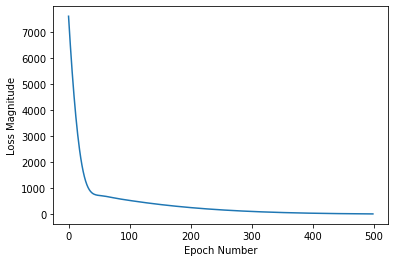

In [23]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

USING THE MODEL TO PREDICT VALUES

We have a model that has been trained to learn the relationship between celsius_q and fahrenheit_a. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

So, for example, if the Celsius value is 100, let's check the farenheit equivalent of this.

In [24]:
print(model.predict([100.0]))

[[211.28062]]


The correct answer is  100×1.8+32=212 , so our model is doing really well.

To review
We created a model with a Dense layer
We trained it with 3500 examples (7 pairs, over 500 epochs).
Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)

CHECKING THE INTERNAL WEIGHTS

In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))

The layer we created is "l0", we check the final weight of this layer after getting the correct output. 
The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as the equation for a line,  y=mx+b , which has the same form as the conversion equation,  f=1.8c+32 .

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.